In [2401]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import numpy as np
import statistics
import os

In [2402]:
#Get the Working Directory
os.getcwd()

'C:\\Users\\sures'

In [2403]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
breast_cancer_file = pd.read_csv('Breast-Cancer-Wisconsin.csv')

In [2404]:
# Preview the first 5 lines of the loaded data 
breast_cancer_file.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2405]:
#Replace ? with NaN
breast_cancer_file ["A7"] = breast_cancer_file["A7"].replace('?',np.NaN)
print (breast_cancer_file)

         Scn  A2  A3  A4  A5  A6   A7  A8  A9  A10  CLASS
0    1000025   5   1   1   1   2    1   3   1    1      2
1    1002945   5   4   4   5   7   10   3   2    1      2
2    1015425   3   1   1   1   2    2   3   1    1      2
3    1016277   6   8   8   1   3    4   3   7    1      2
4    1017023   4   1   1   3   2    1   3   1    1      2
5    1017122   8  10  10   8   7   10   9   7    1      4
6    1018099   1   1   1   1   2   10   3   1    1      2
7    1018561   2   1   2   1   2    1   3   1    1      2
8    1033078   2   1   1   1   2    1   1   1    5      2
9    1033078   4   2   1   1   2    1   2   1    1      2
10   1035283   1   1   1   1   1    1   3   1    1      2
11   1036172   2   1   1   1   2    1   2   1    1      2
12   1041801   5   3   3   3   2    3   4   4    1      4
13   1043999   1   1   1   1   2    3   3   1    1      2
14   1044572   8   7   5  10   7    9   5   5    4      4
15   1047630   7   4   6   4   6    1   4   3    1      4
16   1048672  

In [2406]:
# convert column "A7" of a DataFrame
breast_cancer_file["A7"] = pd.to_numeric(breast_cancer_file['A7'])

In [2407]:
#Count Missing Values
missing_value_count = breast_cancer_file["A7"].isnull().sum()
print(missing_value_count)

16


In [2408]:
#replace NaN values with mean value of the column 7 and use the parameter skipna=True
breast_cancer_file = breast_cancer_file.fillna(value = breast_cancer_file["A7"].mean(skipna = True))

In [2409]:
#Apply the above functions to the entire dataframe
breast_cancer_file_replace_all = breast_cancer_file.replace('?',np.NaN)
convert_numeric_all = breast_cancer_file_replace_all.apply(pd.to_numeric)
convert_mean_all = convert_numeric_all.fillna(convert_numeric_all.mean(skipna = True))

In [2410]:
#provide the summary statistic
convert_mean_all.describe(percentiles=None, include=None, exclude=None)

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [2411]:
# Find the number of rows and columns. use a proper index for column and row (consult pandas). 
# Report how many observations (row) and columns
convert_mean_all.shape
n_rows = convert_mean_all.shape[0]
n_col = convert_mean_all.shape[1]
print("Number of rows:",n_rows)
print("Number of columns:", n_col)

Number of rows: 699
Number of columns: 11


In [2412]:
#Report how many unique id values (column Scn) - hint the length of unique ids
unique_ids = len(convert_mean_all['Scn'].unique()) 
print(unique_ids)

645


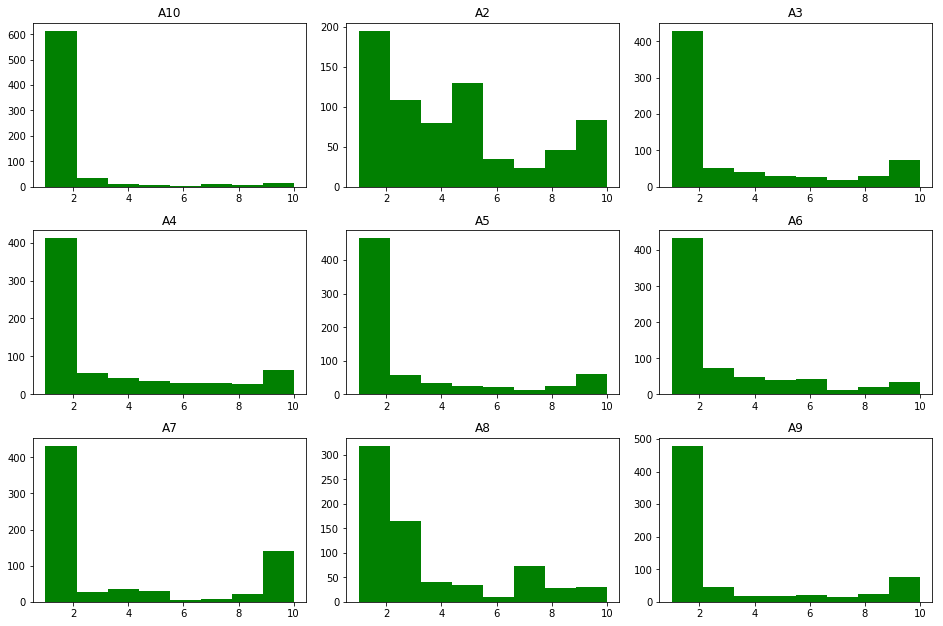

In [2413]:
#Draw histograms for columns A2-A10
slice_convert_mean_all = convert_mean_all.loc[:,'A2':'A10']
hist_cancer = slice_convert_mean_all.hist(column=None, by=None, grid=False, bins=8,facecolor='green',alpha=2)
plt.tight_layout(rect=[1, 1, 3.2, 3.2])
plt.show()

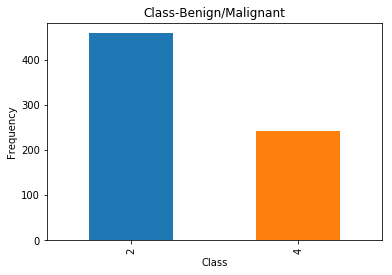

In [2414]:
#Draw a bar plot for CLASS - you can use groupby to see counts of  benign and malignant 
#values or you can count values directly using pd.value_counts() function and apply it to plot.bar() function.
pd.value_counts(convert_mean_all["CLASS"]).plot.bar(x=None, y=None)
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.title('Class-Benign/Malignant')
plt.show()

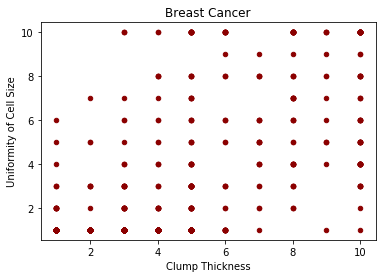

In [2415]:
#Draw a scatterplot of any two columns
convert_mean_all.plot.scatter('A2', 'A3', s=None, c='DarkRed')
plt.ylabel('Uniformity of Cell Size')
plt.xlabel('Clump Thickness')
plt.title('Breast Cancer')
plt.show()

In [2416]:
# Summary
#1. The data quality seems reasonably good with only 16 values missing
#2. The unique id count of 645 out of 699 indicate not too many replications
#3. The standard deviations of a few columns like A3(uniformity of cell size) and A9 (normal nuclei)seems high


In [2417]:
#Phase 2
#Import KMeans
import matplotlib.pyplot as plt
#Import matplotlib
from sklearn.cluster import KMeans

In [2418]:
#Use KMeans algorithm (do not use column CLASS) 
#use only columns A2-A10 - kdf- data frame with A2:A10
kdf = slice_convert_mean_all
#create KMeans model for n_cluster = 4
# Create a KMeans instance with 4 clusters: model
model = KMeans(n_clusters = 4)
#fit model to your data
model.fit(kdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [2419]:
#calculate centroids
#Assign the cluster centers: centroids
centroids = model.cluster_centers_

In [2420]:
#print centroids
print(centroids)

[[2.97155361 1.25820569 1.3785558  1.3107221  2.0547046  1.35128199
  2.07439825 1.21444201 1.10284464]
 [6.72151899 8.36708861 8.40506329 7.81012658 6.73417722 9.2278481
  7.36708861 7.82278481 3.82278481]
 [7.53968254 7.46031746 7.04761905 4.3015873  5.93650794 3.6291106
  5.61904762 7.25396825 2.19047619]
 [7.24       4.85       5.04       4.75       4.03       9.02544656
  5.19       3.74       1.67      ]]


In [2421]:
print(model.inertia_)

15041.803937316581


In [2422]:
#calculate inertia:
#create a range from 1 to 15 or more
ks = range(1,20)

In [2423]:
#create an empty list for inertias values
inertias = []

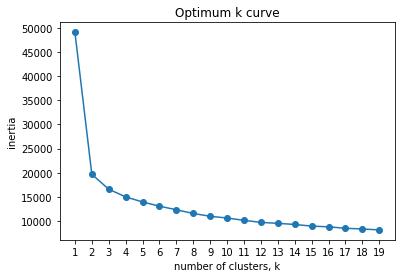

In [2424]:
#use for loop to calculate KMeans for each values
for k in ks:
     # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
     # Fit model to samples
    model.fit(slice_convert_mean_all)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('Optimum k curve')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [2440]:
#The 'elbow' of the plot above is at k=5 indicating the optimal k for this dataset is 5

In [2426]:
#Revise data variation
#apply standard deviation function for columns A2-A10
# standard deviation of the dataframe
gsd = np.std(kdf)
print(gsd)

A2     2.813726
A3     3.049276
A4     2.969786
A5     2.853336
A6     2.212715
A7     3.599274
A8     2.436619
A9     3.051449
A10    1.713851
dtype: float64


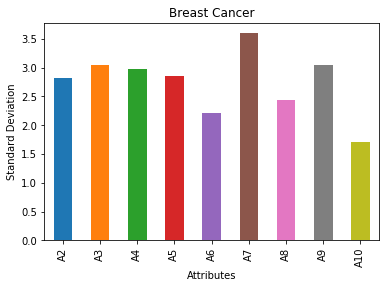

In [2427]:
#plot standard deviation values - select a graphic that could display all nine values 
#[do not use histogram], add title, legend, ylabel, xlabel. 
#Can you capture how wide or narrow is the variation in each column?
gsd.plot.bar(x='Types', y='Variances',title = 'Breast Cancer')
plt.xlabel('Attributes')
plt.ylabel('Standard Deviation')
plt.show()

In [2428]:
# Based on the above histogram, the variations of A3,A7 and A9 are wider than the rest. A7 has the widest variation whereas A10 has the narrowest

In [2429]:
#Implement normalization
#import make_pipeline 
#import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
#use the n_cluster based on the optimal number you have identified from Inertia
kmodel = KMeans(n_clusters = 5)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmodel)
# Fit the pipeline to model
pipeline.fit(kdf)
#Assign the cluster centers: centroids
centroids = kmodel.cluster_centers_
#print centroids
print(centroids)

[[-0.53065855 -0.62146235 -0.62309359 -0.53377982 -0.54254687 -0.61117516
  -0.57277702 -0.55151419 -0.30639302]
 [ 0.85920045  1.66507969  1.62169595  1.49841657  1.35919265  1.21020769
   1.6840579   1.47397297  0.15033128]
 [ 1.17836418  1.69401617  1.70356624  1.51628351  1.87581455  1.08040596
   1.32515499  1.60570082  4.07109746]
 [ 0.92640534  0.49981011  0.56253531  0.87974434  0.29919161  1.5563375
   0.75125578  0.1794824  -0.01659295]
 [ 1.07801576  0.92044768  0.9007092  -0.08349507  0.94802187  0.24981351
   0.27097829  1.18738458  0.09083906]]


In [2430]:
kmodel_phase3 = KMeans(n_clusters = 2, n_init=20, max_iter=500)

In [2431]:
kmodel_phase3.fit(kdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [2432]:
labels = kmodel_phase3.labels_

In [2433]:
kdf['Labels'] = labels
print(kdf)

     A2  A3  A4  A5  A6         A7  A8  A9  A10  Labels
0     5   1   1   1   2   1.000000   3   1    1       0
1     5   4   4   5   7  10.000000   3   2    1       1
2     3   1   1   1   2   2.000000   3   1    1       0
3     6   8   8   1   3   4.000000   3   7    1       1
4     4   1   1   3   2   1.000000   3   1    1       0
5     8  10  10   8   7  10.000000   9   7    1       1
6     1   1   1   1   2  10.000000   3   1    1       0
7     2   1   2   1   2   1.000000   3   1    1       0
8     2   1   1   1   2   1.000000   1   1    5       0
9     4   2   1   1   2   1.000000   2   1    1       0
10    1   1   1   1   1   1.000000   3   1    1       0
11    2   1   1   1   2   1.000000   2   1    1       0
12    5   3   3   3   2   3.000000   4   4    1       0
13    1   1   1   1   2   3.000000   3   1    1       0
14    8   7   5  10   7   9.000000   5   5    4       1
15    7   4   6   4   6   1.000000   4   3    1       0
16    4   1   1   1   2   1.000000   2   1    1 

In [2434]:
kdf['Labels']= kdf['Labels'].replace(0, 2)

In [2435]:
kdf['Labels']= kdf['Labels'].replace(1, 4)

In [2436]:
print(kdf.head(n=15))

    A2  A3  A4  A5  A6    A7  A8  A9  A10  Labels
0    5   1   1   1   2   1.0   3   1    1       2
1    5   4   4   5   7  10.0   3   2    1       4
2    3   1   1   1   2   2.0   3   1    1       2
3    6   8   8   1   3   4.0   3   7    1       4
4    4   1   1   3   2   1.0   3   1    1       2
5    8  10  10   8   7  10.0   9   7    1       4
6    1   1   1   1   2  10.0   3   1    1       2
7    2   1   2   1   2   1.0   3   1    1       2
8    2   1   1   1   2   1.0   1   1    5       2
9    4   2   1   1   2   1.0   2   1    1       2
10   1   1   1   1   1   1.0   3   1    1       2
11   2   1   1   1   2   1.0   2   1    1       2
12   5   3   3   3   2   3.0   4   4    1       2
13   1   1   1   1   2   3.0   3   1    1       2
14   8   7   5  10   7   9.0   5   5    4       4


In [2437]:
kdf['CLASS'] = convert_mean_all['CLASS']
print(kdf)

     A2  A3  A4  A5  A6         A7  A8  A9  A10  Labels  CLASS
0     5   1   1   1   2   1.000000   3   1    1       2      2
1     5   4   4   5   7  10.000000   3   2    1       4      2
2     3   1   1   1   2   2.000000   3   1    1       2      2
3     6   8   8   1   3   4.000000   3   7    1       4      2
4     4   1   1   3   2   1.000000   3   1    1       2      2
5     8  10  10   8   7  10.000000   9   7    1       4      4
6     1   1   1   1   2  10.000000   3   1    1       2      2
7     2   1   2   1   2   1.000000   3   1    1       2      2
8     2   1   1   1   2   1.000000   1   1    5       2      2
9     4   2   1   1   2   1.000000   2   1    1       2      2
10    1   1   1   1   1   1.000000   3   1    1       2      2
11    2   1   1   1   2   1.000000   2   1    1       2      2
12    5   3   3   3   2   3.000000   4   4    1       2      4
13    1   1   1   1   2   3.000000   3   1    1       2      2
14    8   7   5  10   7   9.000000   5   5    4       4

In [2439]:
def ErrorRate(a=kdf['Labels'], b=kdf['CLASS']):
    error_B = len(kdf[(kdf['Labels']==4) & (kdf['CLASS']==2)]) / len(kdf[(kdf['Labels']==2)])
    error_M = len(kdf[(kdf['Labels']==2) & (kdf['CLASS']==4)]) / len(kdf[(kdf['Labels']==4)])
    error_T = len(kdf[(kdf['Labels']) != (kdf['CLASS'])]) / len(kdf)
    print("error rate for benign:", error_B)
    print("error rate for malign:",error_M)
    print("Total error rate:",error_T)
ErrorRate(a,b)

error rate for benign: 0.023605150214592276
error rate for malign: 0.0815450643776824
Total error rate: 0.04291845493562232


In [ ]:
##The project gave us good insight into a typical workflow of a Python project involving data frames, KMeans, plots and clusters. This also provided a great opportunity to collaborate and work as a team. While we fully appreciate that most of the coding can be optimized further, we believe that we have made a sincere effort to bring in the best of the knowledge elements within the team. There was a fair amount of learning involved in the are pipeline building, fitting to models etc. We have also learned how to read data from a file, cleaned, transformed, tried to understand the variations in the data. However, we still believe we need to do practice many more such projects to become versatile with the nuances of Python. Also, we wish we had some more inputs on the theoretical framework around K-means, clustering etc. 